# Gradient Descent

Since our data has multiple features, then the gradient for our model at point p is defined as a vector of all partial derivatives.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from mlxtend.plotting import plot_decision_regions
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import decomposition
from sklearn.metrics import roc_curve, roc_auc_score
import random
import math

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AmyrMa/INDE-577/main/data/data.csv')
df = df.drop(['id','Unnamed: 32'], axis = 1)
df['diagnosis'] = np.where(df['diagnosis'] == 'M', 1, -1)
y = np.array(df['diagnosis'])
X = df.drop(['diagnosis'], axis = 1)
sc = StandardScaler()
X = sc.fit_transform(X)

In [3]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 40)

$y = \beta + \theta X$ \
this is the function for gradient descent, next we will implement the function to calculate the beta and theta 


In [4]:
def initialize(dim):
    b = random.random()
    theta = np.random.rand(dim)
    return b,theta
b , theta = initialize(X.shape[1])
print("Bias:",b,'Weights: ',theta)

Bias: 0.5242537914067388 Weights:  [0.63002669 0.78231461 0.03480327 0.07585951 0.85189393 0.67682128
 0.07967443 0.6410996  0.53470117 0.79409415 0.62513032 0.68990476
 0.47595592 0.38336673 0.81971996 0.94553131 0.52158149 0.3760673
 0.72527265 0.13822093 0.10782304 0.69904969 0.55220947 0.31136686
 0.24482814 0.83171952 0.59627623 0.4103345  0.73895863 0.87398559]


In [5]:
def predict_Y(b,theta,X_train):
    return b + np.dot(X_train,theta)
y_pred = predict_Y(b,theta,X_train)
y_pred[0:10]

array([  3.71826612,  -4.54364614, -12.53451023,  -0.93469517,
        -1.50950021,   7.87339777,  -1.7399908 ,  -1.95832823,
        -0.50977544,  -3.75728233])

In [6]:
def get_cost(y_train,y_pred):
    Y_resd=y_train-y_pred
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(y_train-Y_resd)
Y_hat=predict_Y(b,theta,X_train)
get_cost(y_train,y_pred)

82.73516530066964

We can see that our cost value is really high, and we want to reduce our cost value as much as possible in order to obtain a good model

In [7]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1
print("After initialization -Bias: ",b,"theta: ",theta)
y_pred=predict_Y(b,theta,X_train)
b,theta=update_theta(X_train,y_train,y_pred,b,theta,0.01)
print("After first update -Bias: ",b,"theta: ",theta)
get_cost(y_train,y_pred)

After initialization -Bias:  0.5242537914067388 theta:  [0.63002669 0.78231461 0.03480327 0.07585951 0.85189393 0.67682128
 0.07967443 0.6410996  0.53470117 0.79409415 0.62513032 0.68990476
 0.47595592 0.38336673 0.81971996 0.94553131 0.52158149 0.3760673
 0.72527265 0.13822093 0.10782304 0.69904969 0.55220947 0.31136686
 0.24482814 0.83171952 0.59627623 0.4103345  0.73895863 0.87398559]
After first update -Bias:  0.5090664444185378 theta:  [ 0.53933926  0.71358163 -0.06418048 -0.01806813  0.73076655  0.51251321
 -0.08475528  0.49085642  0.41249451  0.69775948  0.51248089  0.63857088
  0.35959515  0.28292963  0.76423404  0.80911801  0.39802974  0.24925419
  0.65173226  0.0382993   0.00895949  0.62758934  0.44474856  0.21246818
  0.13939642  0.6937966   0.4509469   0.27001695  0.63796086  0.76317885]


82.73516530066964

In [8]:
def run_gradient_descent(X, Y, alpha, num_iterations):
    b, theta = initialize(X.shape[1])
    iter_num = 0
    gd_iterations_df = pd.DataFrame(columns = ['iteration','cost'])
    result_idx = 0
    for each_iter in range(num_iterations):
        Y_hat = predict_Y(b,theta,X)
        this_cost = get_cost(Y,Y_hat)
        prev_b = b
        prev_theta = theta
        b,theta = update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
            result_idx = result_idx+1
        iter_num +=1
    print('Final Estimate of b and theta : ',b,theta)
    return gd_iterations_df,b,theta
gd_iterations_df,b,theta=run_gradient_descent(X_train,y_train,alpha=0.01,num_iterations=200)

Final Estimate of b and theta :  -0.2216409758541156 [ 0.07899404 -0.01275424 -0.11121362  0.55615818  0.20599108  0.09908218
 -0.29763065 -0.19408131 -0.12656654 -0.12521267  0.32876616  0.09219651
 -0.04978364 -0.286427    0.08662362 -0.26345111 -0.10724566  0.27249545
 -0.04381254  0.07092773 -0.16231008  0.13008306 -0.07777435  0.31204546
 -0.00318821  0.27264787  0.44606429 -0.03666322  0.25570802 -0.11338018]


In [9]:
gd_iterations_df

,iteration,cost
0,0.0,61.493606
1,10.0,2.570678
2,20.0,1.174785
3,30.0,0.769339
4,40.0,0.585351
5,50.0,0.490602
6,60.0,0.438210
7,70.0,0.407096
8,80.0,0.387096
9,90.0,0.373152


We see that the cost value droped significantly

Text(0, 0.5, 'Cost or MSE')

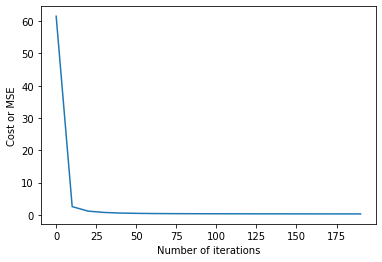

In [10]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost or MSE')

In [11]:
y_pred = predict_Y(b,theta,X_test)

In [15]:
y_pred = np.where(y_pred < 0, -1 , 1)

In [17]:
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.99      0.98      0.98        99
           1       0.96      0.98      0.97        44

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



Given our response value is binary result, we have encoded it as -1 and 1. The gradient descent is mainly used for regression, so I decide to make any prediction that is less than 0 to euqal to -1, and otherwise 1. we see that the prediction accuracy is 0.98 which is very high.